## Data Wrangling Project

In [170]:
#Importing necessary libraries
import requests
import pandas as pd
import re
import numpy as np
import tweepy
import json
import time
import os
import matplotlib.pyplot as plt

### Gathering the data

In [171]:
# importing given file and checking the details
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [172]:
#making a copy
tweets = twitter_archive.copy()

In [173]:
# taking the ID of tween from url in column 'expanded_urls'
tweets.tweet_id=tweets.expanded_urls.str.extract('(\d{18})')
tweets.tweet_id[0:5]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [174]:
# downloading image_predictions file using requests 
images_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(images_url)
with open('image_prediction.tsv', mode = 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_prediction.tsv',delimiter='\t')

In [175]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [14]:
# gathering data from api tweet_info
# waringn if you want to download it once again - please filfill the gaps with necessary keys and tokens
consumer_key = 'YOUR PERSONAL KEY'
consumer_secret = 'YOUR PERSONAL KEY'
access_token = 'YOUR PERSONAL TOKEN'
access_secret = 'YOUR PERSONAL SECRET TOKEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [176]:
# creating a for loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [177]:
# making a fo loop to append each tweet into a list
tweets_data = []
tweet_file = open('tweet_json.txt', "r")
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue    
tweet_file.close()

In [178]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [179]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [180]:
tweet_info.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8345,38136
1,892177421306343426,6166,32713
2,891815181378084864,4079,24629
3,891689557279858688,8488,41485
4,891327558926688256,9178,39650
5,891087950875897856,3057,19908
6,890971913173991426,2027,11641
7,890729181411237888,18518,64346
8,890609185150312448,4194,27351
9,890240255349198849,7247,31391


In [181]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


### Assesing the data

In [182]:
# checking the dimension of DataFrame
twitter_archive.shape

(2356, 17)

In [183]:
# viewing the information about fulfilment and type of the data in twitter_archive and viewing first 10 rows
twitter_archive.info()
twitter_archive.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [184]:
# viewing last 5 rows from the data frame 
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [185]:
# listing sorted values of names of dogs,  alphabetically
twitter_archive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [186]:
# viewing basic descriptive statistics DataFrame 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [187]:
# checking the dimension of DataFrame image_predictions
image_predictions.shape

(2075, 12)

In [188]:
# viewing the information about fulfilment and type of the data in image_predictionand and viewing first 10 rows
image_predictions.info()
image_predictions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [189]:
# Viewing last 5 rows of image_predictions
image_predictions.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [190]:
# viewing basic descriptive statistics DataFrame 
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [191]:
# checking the dimension of DataFrame tweet_info
tweet_info.shape

(2342, 3)

In [192]:
# viewing the information about fulfilment and type of the data in tweet_info and viewing first 10 rows
tweet_info.info()
tweet_info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


,id,retweet_count,favorite_count
0,892420643555336193,8345,38136
1,892177421306343426,6166,32713
2,891815181378084864,4079,24629
3,891689557279858688,8488,41485
4,891327558926688256,9178,39650
5,891087950875897856,3057,19908
6,890971913173991426,2027,11641
7,890729181411237888,18518,64346
8,890609185150312448,4194,27351
9,890240255349198849,7247,31391


In [193]:
# viewing last 5 rows of image_predictions
tweet_info.tail(5)

,id,retweet_count,favorite_count
2337,666049248165822465,41,108
2338,666044226329800704,139,295
2339,666033412701032449,43,124
2340,666029285002620928,47,128
2341,666020888022790149,506,2537


In [194]:
# viewing basic descriptive statistics DataFrame 
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,2943.260034,7983.564902
std,6.832408e+16,4949.746711,12358.603739
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,591.500000,1378.000000
50%,7.186224e+17,1374.500000,3472.500000
75%,7.986971e+17,3431.250000,9781.500000
max,8.924206e+17,83893.000000,164648.000000


### Quality of the data

 - in twitter_archive columns 'in_reply_to_status_id' and 'in_reply_to_user_id' there are erronous datatypes and valuses 
 - in twitter_archive we have tweet_id in wrong datatype it should be string
 - Columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not quite usefull, we don't need retweets
 - in twitter_archive we have difficoult to read sources
 - in twitter_archive a part of dog names is incorrect
 - in twitter_archive tweet_id:810984652412424192 doesn't contain a rating
 - in twitter_archive we would like to have only original ratings
 - in twitter_archive timestamp there is wrong datatype
 - in twitter_archive not all tweets have images (the shape is not equal for rows)
 - in image_predications there are wierd dogos breads as 'fur_coat', it is possible that it isn't a dog ;) 
 - dogos breads are written in different ways
 - after compbaingin puppest and floffers - in one variable it should be a category type
 - the archive data should contain also images


### Tidiness of the data

 - in twitter_archive columns 'doggo', 'floofer', 'pupper','puppo' are one variable but in 4 columns and some of them has two values
 - tweet_info should be joined to twitter_archive data
 - rating numerator and dominator should be shown as a one variable


### Cleaning the data

In [195]:
# making copies of the Data before cleaning
ta = twitter_archive.copy()
ip = image_predictions.copy()
ti = tweet_info.copy()

In [196]:
#checking if copy is made
ta.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [197]:
# checking if copy is made
ip.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [198]:
# checking if copy is made
ti.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8345,38136


#### Problem
Quality: columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not quite usefull, we don't need retweets
#### Define
Delete columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'

In [199]:
ta = ta[twitter_archive.tweet_id.notnull()]
ta = ta[twitter_archive.retweeted_status_id.isnull()]
ta = ta.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Tests

In [200]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Problem
Quality: tweets should have images but there is less rows for images than for tweets
#### Define
Delete rows there is no match for image

In [201]:
image_id=ip[['tweet_id']]
ta=pd.merge(ta,image_id,on='tweet_id')

In [202]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


#### Problem
Quality: column 'timestamp' in twitter archive has wrong datatype
#### Define
Convert the column to proper datatype

In [203]:
ta.timestamp=pd.to_datetime(ta.timestamp)

In [204]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 233.7+ KB


#### Problem
Tidiness: in twitter_archive columns 'doggo', 'floofer', 'pupper','puppo' are one variable but in 4 columns and some of them has two values. 
#### Define
Take only data with one value and create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available
and drop all the previous ones.

In [205]:
#checking how many rows there is before filtering
ta.shape

(1994, 14)

In [206]:
#checkign which rows should be filtered
ta.loc[(ta[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1)>1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
148,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
154,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
340,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
397,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
419,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
425,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
510,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
652,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
704,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
795,741067306818797568,NaN,NaN,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll

In [207]:
#filtering the data
ta=ta[(ta.tweet_id!=855851453814013952)
&(ta.tweet_id!=854010172552949760)
&(ta.tweet_id!=817777686764523521)
&(ta.tweet_id!=808106460588765185)
&(ta.tweet_id!=802265048156610565)
&(ta.tweet_id!=801115127852503040)
&(ta.tweet_id!=785639753186217984)
&(ta.tweet_id!=759793422261743616)
&(ta.tweet_id!=751583847268179968)
&(ta.tweet_id!=741067306818797568)
&(ta.tweet_id!=733109485275860992)]

In [208]:
# creating 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
ta['dog_stage'] = ta['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [209]:
# creating variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
ta = ta.drop(columns, axis=1)

#### Test

In [210]:
ta.shape

(1983, 11)

In [211]:
ta.dog_stage.value_counts()

pupper     221
doggo      64 
puppo      27 
floofer    3  
Name: dog_stage, dtype: int64

#### Problem
Quality: the dog stage is a category not an usual object - the datatype should be changed
#### Define
Change the datatype for 'dog_stage' to a category 

In [212]:
ta['dog_stage'] = ta['dog_stage'].astype('category')

#### Test

In [213]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1983 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1983 non-null datetime64[ns]
source                   1983 non-null object
text                     1983 non-null object
expanded_urls            1983 non-null object
rating_numerator         1983 non-null int64
rating_denominator       1983 non-null int64
name                     1983 non-null object
dog_stage                315 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 172.5+ KB


#### Problem
Quality: change a view of sources becouse it's hard to read
#### Define
Remove urlis signs before acctual source

In [214]:
ta.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1944
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [215]:
# replacing the unreadable sources to bettwr for the eye
ta['source'] = ta['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
ta['source'] = ta['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
ta['source'] = ta['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [216]:
# changing datatype of source into a category
ta['source'] = ta['source'].astype('category')

#### Tests

In [217]:
ta.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [218]:
ta.source.value_counts()

Twitter for iPhone    1944
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

In [219]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1983 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1983 non-null datetime64[ns]
source                   1983 non-null category
text                     1983 non-null object
expanded_urls            1983 non-null object
rating_numerator         1983 non-null int64
rating_denominator       1983 non-null int64
name                     1983 non-null object
dog_stage                315 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 159.1+ KB


#### Problem
Quality: 
- In ta, nulls represented as 'None' in columns 'name', 
- Some values are wrong in name. Names that varen't capitalized are wrong.
#### Define
Set the value wrong names to 'None' and replace 'None' with np.nan.

In [220]:
# writing locations where columna 'name' is lowercase 
# and 'text' column contains 'named' and lowercase and 'text', column contains the words 'name is' - to extract names
named_to_replace = ta.loc[(ta['name'].str.islower()) & (ta['text'].str.contains('named'))]
name_is_to_replace = ta.loc[(ta['name'].str.islower()) & (ta['text'].str.contains('name is'))]
not_named_to_replace = ta.loc[(ta['name'].str.islower())]

# insert it into a list
named_to_replace_list = named_to_replace['text'].tolist()
name_is_to_replace_list = name_is_to_replace['text'].tolist()
not_named_to_replace_list = not_named_to_replace['text'].tolist()

# making a 'For loop' to iterate through all rows where name is lowercase and the words 'named' 
# appear in 'text' and extract the 'name' value to be the word that appears after 'named'
for entry in named_to_replace_list:
    mask = ta.text == entry
    name_column = 'name'
    ta.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# making a 'For loop' to iterate through locations where name is lowercase and the phrase 'name is' 
# appear in 'text' and extract the 'name' value to be the word that appears after 'name is'    
for entry in name_is_to_replace_list:
    mask = ta.text == entry
    name_column = 'name'
    ta.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# making a 'For loop' to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in not_named_to_replace_list:
    mask = ta.text == entry
    name_column = 'name'
    ta.loc[mask, name_column] = "None"

In [221]:
# replacing name "O" by "O'Malley"
ta['name'].replace("O","O'Malley", inplace=True)

In [222]:
# replacing names with none as nan
ta['name'] = ta['name'].replace('None', np.NaN)

#### Tests

In [223]:
ta.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny        9 
Tucker       9 
Sadie        8 
Winston      8 
Toby         7 
Daisy        7 
Lola         7 
Bella        6 
Stanley      6 
Jax          6 
Bo           6 
Koda         6 
Rusty        5 
Bailey       5 
Dave         5 
Leo          5 
Louis        5 
Buddy        5 
Scout        5 
Chester      5 
Milo         5 
Oscar        5 
Dexter       4 
Finn         4 
Sophie       4 
Clarence     4 
            .. 
Maxwell      1 
Rhino        1 
Wishes       1 
Bilbo        1 
Davey        1 
Gilbert      1 
Callie       1 
Zooey        1 
Doobert      1 
Crimson      1 
Newt         1 
Koko         1 
Mary         1 
Charl        1 
Quinn        1 
Vinnie       1 
Pumpkin      1 
Chaz         1 
Arnold       1 
Bookstore    1 
Mabel        1 
Evy          1 
Bodie        1 
Zeek         1 
Mingus       1 
Logan        1 
Sparky       1 
Tedders      1 
Herschel     1 
Dobby        1 
Name: name, Length: 910,

In [224]:
ta[ta.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
561,776201521193218049,NaN,NaN,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN


In [225]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1983 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1983 non-null datetime64[ns]
source                   1983 non-null category
text                     1983 non-null object
expanded_urls            1983 non-null object
rating_numerator         1983 non-null int64
rating_denominator       1983 non-null int64
name                     1346 non-null object
dog_stage                315 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 159.1+ KB


In [226]:
ta.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo


#### Problem
Quality: In ta (twitter archive), some ratings are wrong. 

Tidiness: Rating_numerator and denominator should be one variable rating.
#### Define
- Change the rating_numerator and rating_denominator for oberservations with wrong value
- Dropping the: '810984652412424192' because it doesn't have a valid rating
- Create new column rating which is an division of rating_numerator/rating_denominator, getting rid of rating_numerator and rating_denominator.
- Droping oberservations with extreme ratings.

In [227]:
# viewing the texts
pd.set_option('display.max_colwidth', -1)
ta.loc[ta.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator', 'name']]

,tweet_id,text,rating_numerator,rating_denominator,name
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,NaN
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,NaN
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,NaN
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,NaN
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,NaN


In [228]:
# changing the values of rating numerator and denominators for those which apply 
ta.loc[ta.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9,10]
ta.loc[ta.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
ta.loc[ta.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
ta.loc[ta.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
ta.loc[ta.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
ta=ta[ta.tweet_id!=810984652412424192]
ta['rating']=ta.rating_numerator/ta.rating_denominator
ta=ta.drop(['rating_numerator','rating_denominator'],axis=1)

ta.loc[ta.rating>2,['tweet_id','text','rating', 'name']]

,tweet_id,text,rating,name
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5,Logan
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7,Sophie
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6,Atticus
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6,NaN
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0,NaN


In [229]:
# we are changing the rating for three tweets that oscillates in the nearby of 1 and excluding by filtering those
# which are extremely high
ta.loc[ta.tweet_id==786709082849828864,'rating']=1.0
ta.loc[ta.tweet_id==778027034220126208,'rating']=1.1
ta.loc[ta.tweet_id==680494726643068929,'rating']=1.1
ta=ta[ta.rating<2]

#### Test

In [230]:
ta.rating.sort_values()

756     0.0
235     0.0
1976    0.1
1735    0.1
1519    0.1
1900    0.1
1964    0.2
1566    0.2
1723    0.2
1887    0.2
1419    0.2
1422    0.2
1948    0.2
1987    0.2
1878    0.2
1547    0.3
1943    0.3
1106    0.3
1167    0.3
1021    0.3
1780    0.3
965     0.3
554     0.3
1826    0.3
1574    0.3
1584    0.3
1972    0.3
1592    0.3
1273    0.3
1880    0.3
       ... 
256     1.4
253     1.4
162     1.4
95      1.4
681     1.4
9       1.4
275     1.4
113     1.4
634     1.4
313     1.4
206     1.4
131     1.4
318     1.4
455     1.4
297     1.4
324     1.4
800     1.4
786     1.4
119     1.4
146     1.4
549     1.4
332     1.4
21      1.4
36      1.4
333     1.4
49      1.4
1280    1.4
147     1.4
278     1.4
165     1.4
Name: rating, Length: 1980, dtype: float64

#### Problem
Quality: In ip (image predictions), some predictions are not dogs, there is no column for the most possible breed of a dog and the confidence.
#### Define
Create new columns predicted_breed and predicted_conf for the most possible breed of a dog and the confidence.

In [231]:
ip['predicted_breed']=ip.p1
ip.predicted_breed[ip.p1_dog==False]=ip.p2
ip.predicted_breed[(ip.p1_dog==False)&(ip.p2_dog==False)]= ip.p3
ip.predicted_breed[(ip.p1_dog==False)&(ip.p2_dog==False)&(ip.p3_dog==False)]='None' 
ip.predicted_breed=ip.predicted_breed.replace('None',np.nan)
ip.predicted_breed[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    Welsh_springer_spaniel
1    redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    miniature_pinscher    
5    Bernese_mountain_dog  
6    NaN                   
7    chow                  
8    golden_retriever      
9    miniature_poodle      
Name: predicted_breed, dtype: object

In [232]:
ip['predicted_conf']=ip.p1_conf
ip.predicted_conf[ip.p1_dog==False]=ip.p2_conf
ip.predicted_conf[(ip.p1_dog==False)&(ip.p2_dog==False)]= ip.p3_conf
ip.predicted_conf[(ip.p1_dog==False)&(ip.p2_dog==False)&(ip.p3_dog==False)]=0 
ip.predicted_conf=ip.predicted_conf.replace(0,np.nan)
ip.predicted_conf[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    0.465074
1    0.506826
2    0.596461
3    0.408143
4    0.560311
5    0.651137
6   NaN      
7    0.692517
8    0.007959
9    0.201493
Name: predicted_conf, dtype: float64

#### Test

In [233]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
predicted_breed    1751 non-null object
predicted_conf     1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


#### Problem
Tidiness: Twittes, tweet informations and images predictions should be together 
#### Define
Join those schemas

In [234]:
# merging two dataframes twitter_arcive - but only a copy and tweet info (also a copy) based on tweet_id and id 
ta = pd.merge(left=ta, right=ti, left_on='tweet_id', right_on = 'id', how='inner')
ta = ta.drop('id', axis=1)

#### Test

In [235]:
# testing if we marged the data and reduced the number of columns
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 12 columns):
tweet_id                 1979 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1979 non-null datetime64[ns]
source                   1979 non-null category
text                     1979 non-null object
expanded_urls            1979 non-null object
name                     1343 non-null object
dog_stage                315 non-null category
rating                   1979 non-null float64
retweet_count            1979 non-null int64
favorite_count           1979 non-null int64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 174.2+ KB


In [236]:
# merging two datasets twitter_archive with merged tweet and a copy of image_predicationsbased on tweet_id 
ta = ta.merge(ip, on='tweet_id', how='inner')

#### Test

In [237]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 25 columns):
tweet_id                 1979 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1979 non-null datetime64[ns]
source                   1979 non-null category
text                     1979 non-null object
expanded_urls            1979 non-null object
name                     1343 non-null object
dog_stage                315 non-null category
rating                   1979 non-null float64
retweet_count            1979 non-null int64
favorite_count           1979 non-null int64
jpg_url                  1979 non-null object
img_num                  1979 non-null int64
p1                       1979 non-null object
p1_conf                  1979 non-null float64
p1_dog                   1979 non-null bool
p2                       1979 non-null object
p2_conf                  1979 non-null float64
p2_dog       

#### Problem
Quality: column 'timestamp' in twitter archive has wrong datatype
#### Define
Convert the column to proper datatype

In [238]:
ta.timestamp=pd.to_datetime(ta.timestamp)

In [239]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 25 columns):
tweet_id                 1979 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1979 non-null datetime64[ns]
source                   1979 non-null category
text                     1979 non-null object
expanded_urls            1979 non-null object
name                     1343 non-null object
dog_stage                315 non-null category
rating                   1979 non-null float64
retweet_count            1979 non-null int64
favorite_count           1979 non-null int64
jpg_url                  1979 non-null object
img_num                  1979 non-null int64
p1                       1979 non-null object
p1_conf                  1979 non-null float64
p1_dog                   1979 non-null bool
p2                       1979 non-null object
p2_conf                  1979 non-null float64
p2_dog       

In [240]:
ta.shape

(1979, 25)

In [241]:
ta['tweet_id'] = ta['tweet_id'].astype('object')

## Store data

Storing cleaned data info a csv named 'twitter_archive_master.csv'

In [242]:
ta.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [243]:
ta_m = pd.read_csv('twitter_archive_master.csv')
ta_m.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,predicted_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581


In [244]:
ta_m.shape

(1979, 25)

## Analyze and Visialise

In [245]:
ta.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,predicted_conf
count,2.200000e+01,2.200000e+01,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03,1.979000e+03,1674.000000
mean,6.962067e+17,4.196984e+09,1.055028,2645.801415,8708.233451,1.204144,0.593248,1.346685e-01,6.036492e-02,0.548697
std,4.391913e+16,0.000000e+00,0.217832,4730.033255,12804.295222,0.562354,0.271855,1.007429e-01,5.093878e-02,0.299368
min,6.671522e+17,4.196984e+09,0.000000,12.000000,80.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000010
25%,6.724855e+17,4.196984e+09,1.000000,590.500000,1872.000000,1.000000,0.362715,5.417505e-02,1.622240e-02,0.299772
50%,6.756022e+17,4.196984e+09,1.100000,1270.000000,3897.000000,1.000000,0.587342,1.180890e-01,4.953060e-02,0.548457
75%,7.002919e+17,4.196984e+09,1.200000,3035.000000,10883.500000,1.000000,0.843635,1.953115e-01,9.164355e-02,0.819996
max,8.558181e+17,4.196984e+09,1.400000,83893.000000,164648.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956


In [246]:
# sorting the values for ratings
values=np.sort(ta.rating.unique())
values

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4])

In [247]:
# making analyzes for stagest of dogs
stage=pd.DataFrame(columns=['dog_stage','number','rating','retweet','favorite'])
stage['dog_stage']=['doggo','floofer','pupper','puppo']
for each_stage in stage.dog_stage:
    stage_df=ta[ta.dog_stage==each_stage]
    stage.loc[stage.dog_stage== each_stage,'number']=stage_df.shape[0]
    stage.loc[stage.dog_stage== each_stage,'rating']=stage_df['rating'].mean()
    stage.loc[stage.dog_stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage.loc[stage.dog_stage== each_stage,'favorite']=stage_df['favorite_count'].mean()

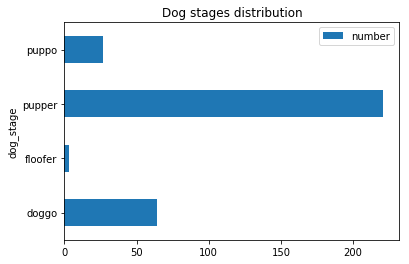

In [248]:
# plot for dog stages distrivbution
stage[['dog_stage','number']].plot(x='dog_stage', kind='barh',title='Dog stages distribution');

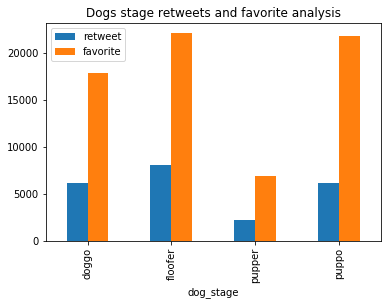

In [249]:
# plot for retweets and favoruites of dog stages 
stage[['dog_stage','retweet','favorite']].plot(x='dog_stage',kind='bar',title='Dogs stage retweets and favorite analysis');

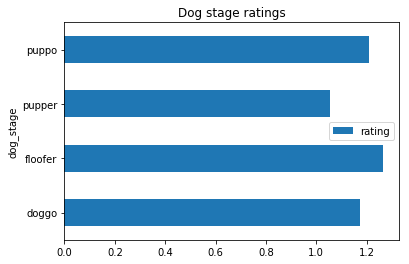

In [250]:
# dog stage vs ratinfs
stage[['dog_stage','rating']].plot(x='dog_stage',kind='barh',title='Dog stage ratings');

In [251]:
# making analyzes for ratings
analyze=pd.DataFrame(columns=['rating','number','retweet','favorite'])
analyze['rating']=values
for x in analyze['rating']:
    this_df=ta[ta.rating==x]
    analyze.loc[analyze.rating==x,'number']=this_df['tweet_id'].count()
    analyze.loc[analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    analyze.loc[analyze.rating==x,'favorite']=this_df.favorite_count.mean()

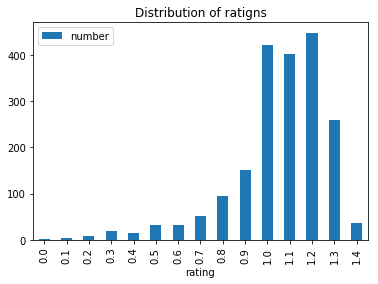

In [252]:
# distribution of ratings
analyze[['rating','number']].plot(x='rating',kind='bar', title='Distribution of ratigns');

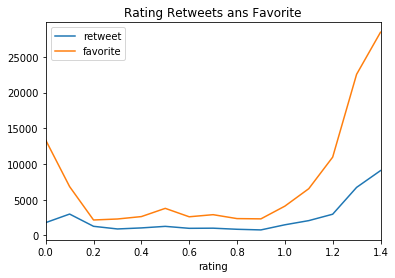

In [253]:
# relation between retweets and favourites
analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating Retweets ans Favorite');

### Insights
- The mean for rating is 1.055 and the thre most common ratings are 1.2,1.0,1.1
- what we can conclude is that the frequency becomes smaller as the rating becomes more extreme.
- The rating distributions is not normal it is left skewed distribution
- Posts with contains higher ratings are supposed to get more favorite ones and theb beeing retweeted. 
- Tweets with rating 1.4 gets the highest favorite counts and retweet counts.
- Pippers has the biggest frequency from all gour categories but in the same time they have lowest favourite counts and retweets. 


### Limitations

From the DataFrame I got rid off those tweets which didn't have images and also some of those which had bad rating. It was neccesary to get good values for rating. What is more we also needed to calculate the ratings becouse vlueas for rating_numerator and rating_denominators were in two variables and some of theme was useless in puprose of getting wrigt rating